In [1]:
# !curl -O https://zenodo.org/record/3755721/files/FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_T.nc

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


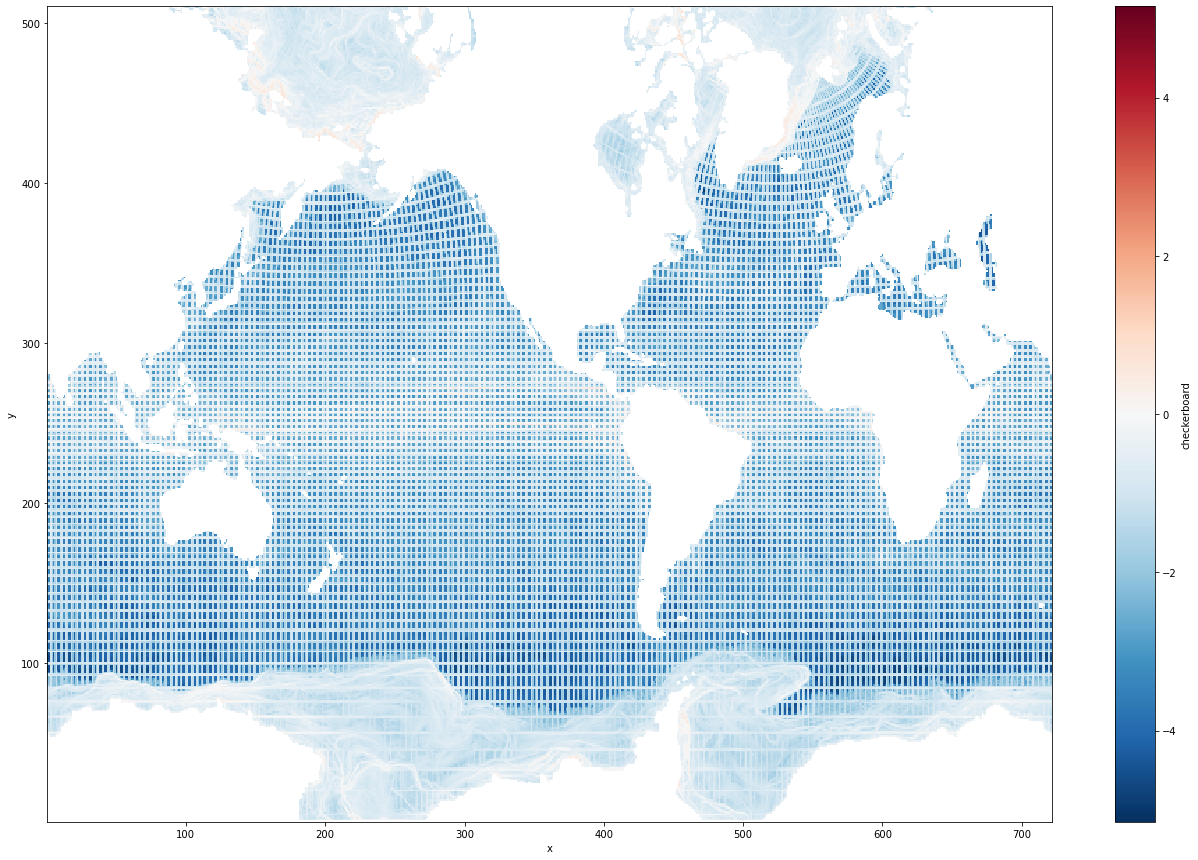

In [26]:
import xarray as xr
import numpy as np

# load data (get from https://zenodo.org/record/3755721/files/FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_T.nc)
data_set = xr.open_dataset(
    "FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_T.nc",
    chunks={"deptht": 1, "time_counter": 1},
)

# necessary for aligning the diffs later
data_set = data_set.assign_coords(x=np.arange(data_set.dims["x"]))
data_set = data_set.assign_coords(y=np.arange(data_set.dims["y"]))

# extract heatflux
heatflux = data_set.sohefldo
heatflux = heatflux.where(heatflux != 0)

# standardized anomalies
heatflux_std = (heatflux - heatflux.mean("time_counter")) / heatflux.std("time_counter")
heatflux_std = heatflux_std.where(heatflux != 0)

# get a sense on size of horizontal differences
heatflux_std_diff = (heatflux_std.diff("x") ** 2 + heatflux_std.diff("y") ** 2) ** 0.5

# can we find a chekerboardhere?
np.log10(heatflux_std_diff.max("time_counter")).rename("checkerboard").plot(size=15)